In [83]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sb
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline

In [84]:
df=pd.read_csv('Downloads\\ML_TASK_CSV.csv')

In [85]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [86]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [87]:
#Drop Column- Row Number
df.drop(['RowNumber'],axis=1, inplace=True)

In [88]:
df.drop(['Surname'],axis=1, inplace=True)

In [89]:
df.drop(['Geography'],axis=1, inplace=True)
df.drop(['Gender'],axis=1, inplace=True)

In [90]:
df.tail() 

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,15606229,771,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,42,3,75075.31,2,1,0,92888.52,1
9999,15628319,792,28,4,130142.79,1,1,0,38190.78,0


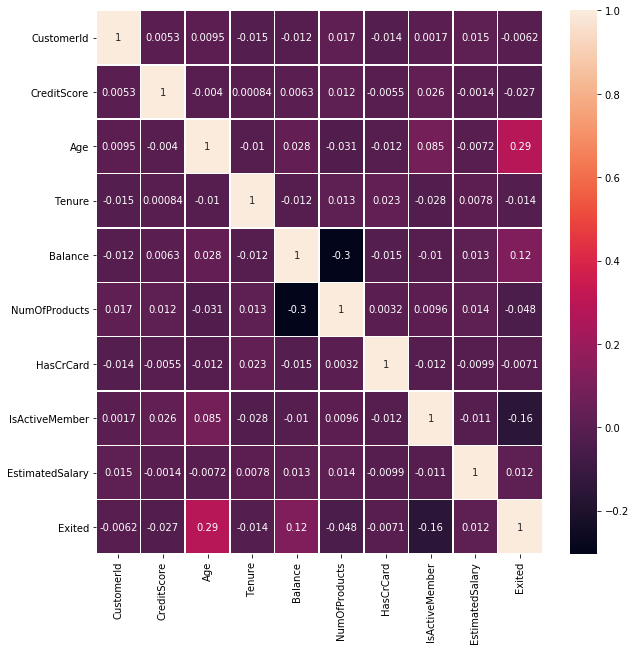

In [91]:
#To check the correlation
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sb.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax)

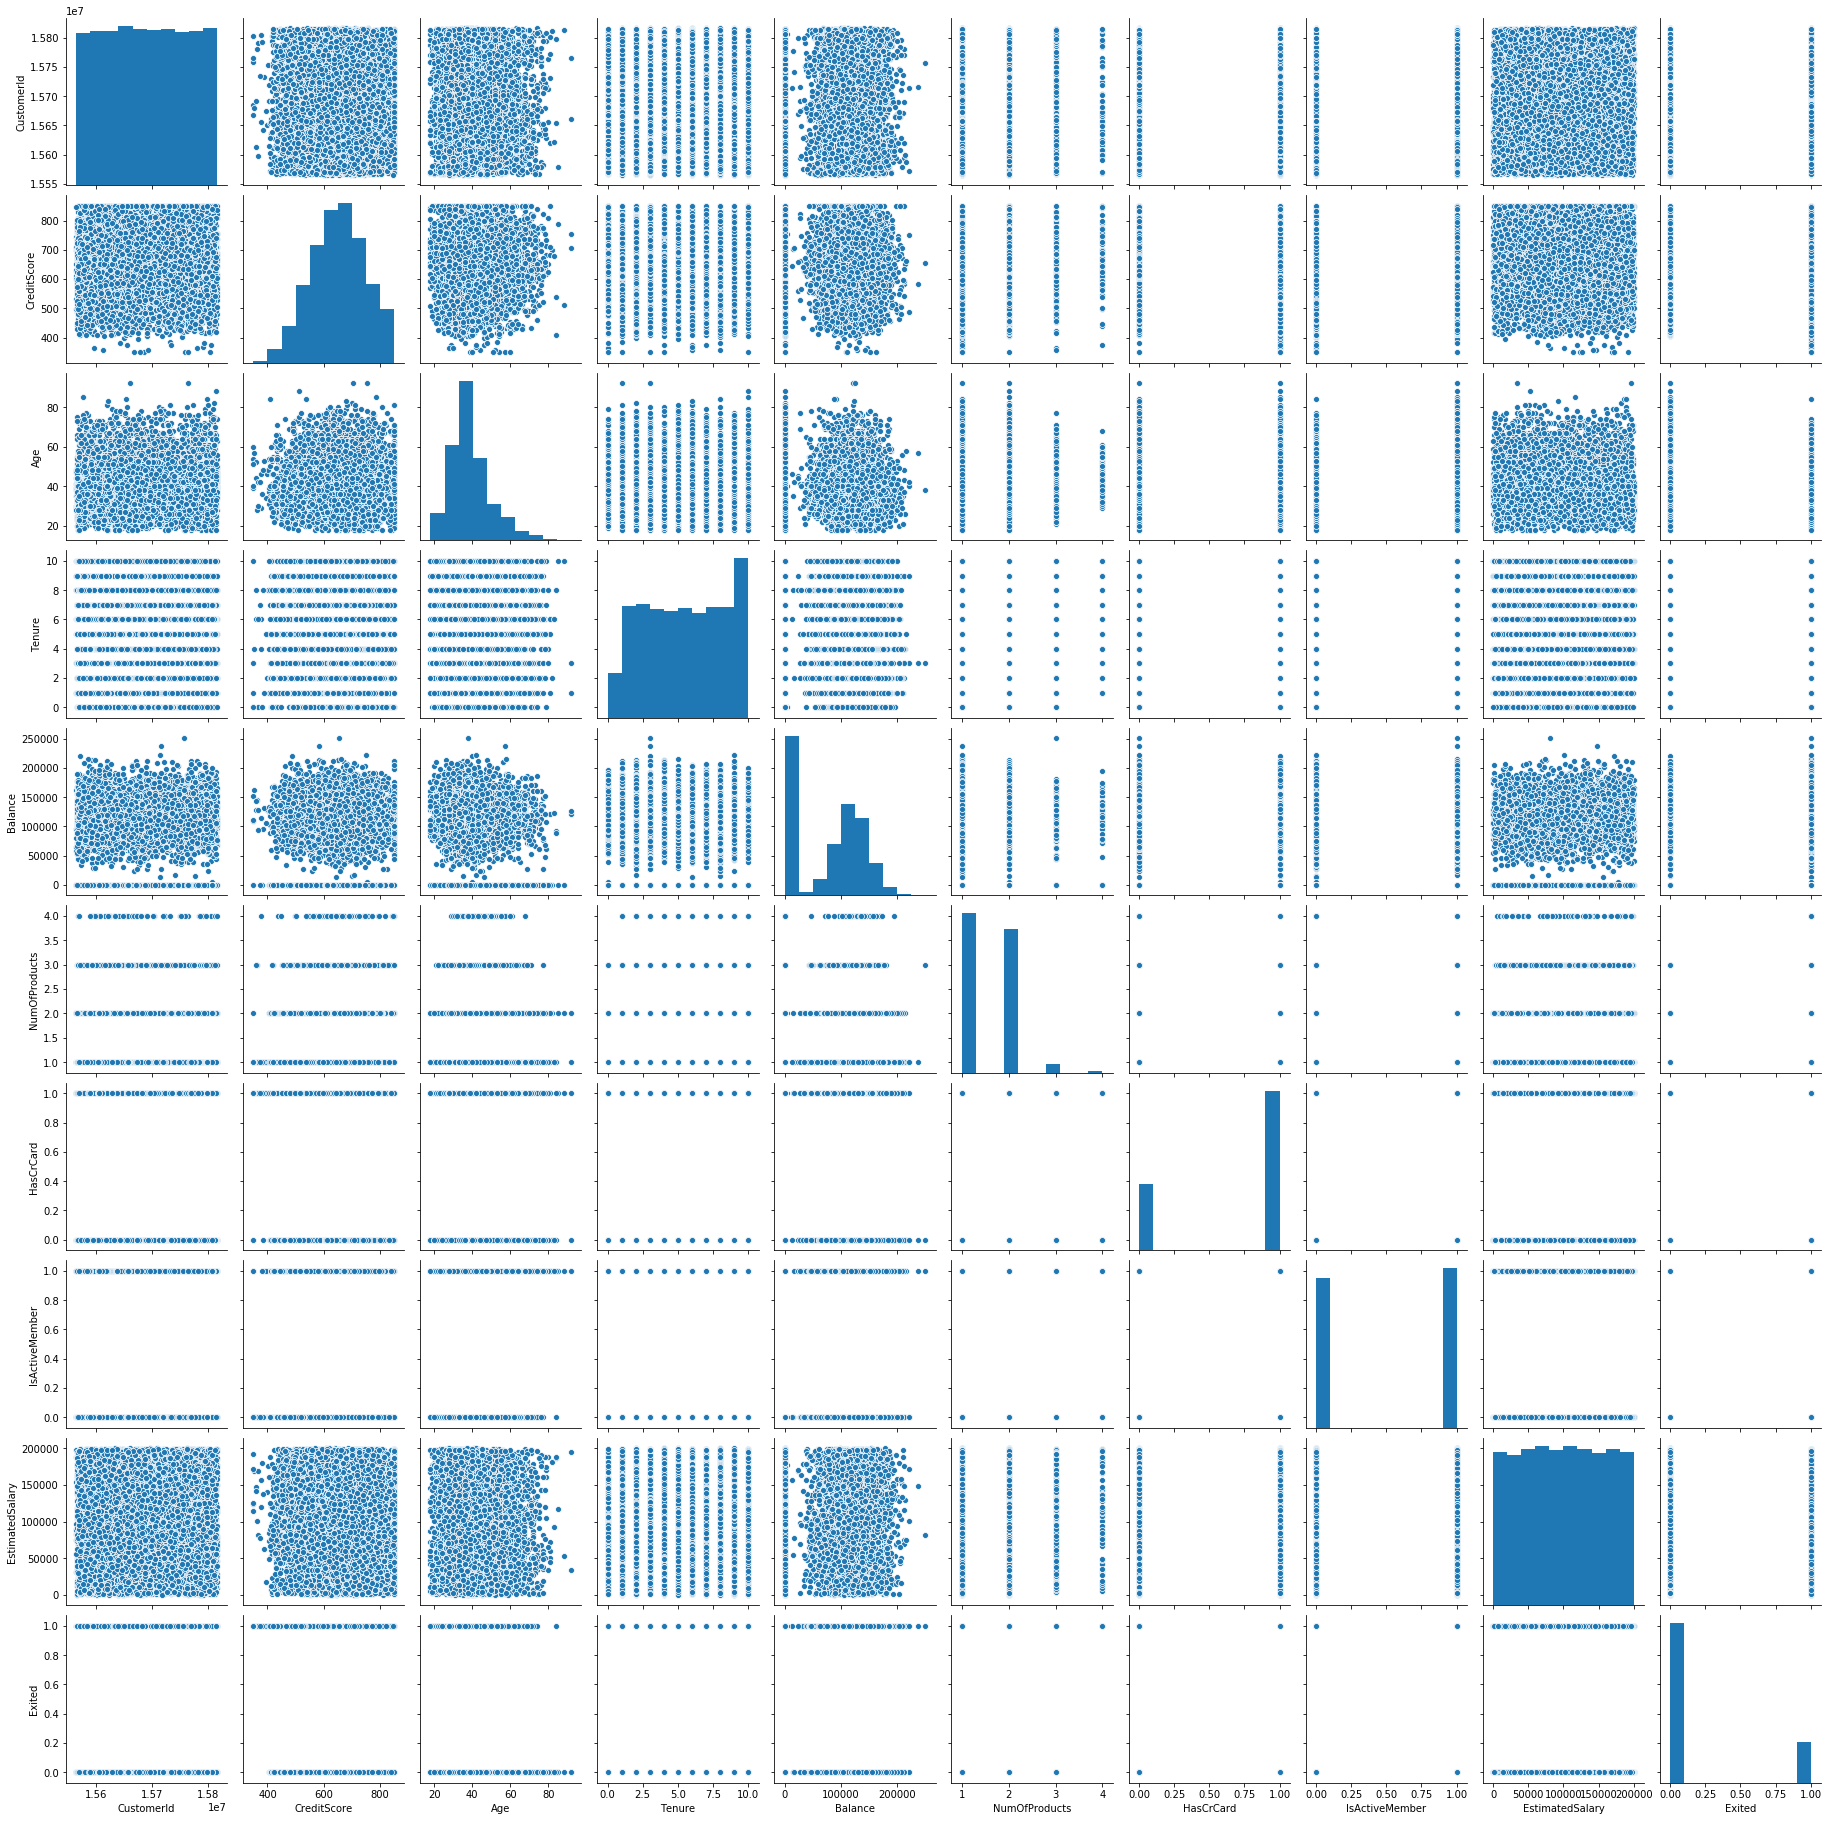

In [92]:
sb.pairplot(df)

In [93]:
#Checking for null values
df.isnull().sum() 

CustomerId         0
CreditScore        0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [94]:
regressor=LogisticRegression()
df1=df.values
train_x=(df1[:,0:8])
train_y=df1[:,9]
print(train_x.shape)
print(train_y.shape)

(10000, 8)
(10000,)


In [95]:
X = train_x.reshape(-1,1) 
y = train_y.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.3, random_state=0)
print(X_train.shape)
print(y_train.shape)
############################################################################

(7000, 8)
(7000,)


In [96]:
from sklearn.preprocessing import MinMaxScaler

ms=MinMaxScaler()
X_train=ms.fit_transform(X_train)
print(X_train)

[[0.27167255 0.582      0.2238806  ... 0.33333333 1.         1.        ]
 [0.70660388 0.382      0.31343284 ... 0.33333333 1.         0.        ]
 [0.77829964 0.48       0.86567164 ... 0.         0.         1.        ]
 ...
 [0.03468969 0.776      0.25373134 ... 0.33333333 1.         0.        ]
 [0.39340052 0.48       0.29850746 ... 0.33333333 1.         1.        ]
 [0.10847779 0.546      0.44776119 ... 0.         1.         0.        ]]


In [97]:
regressor.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [98]:
y_pred=regressor.predict(X_train)
for i in range(0,len(X_train)):
    print(y_train[i],y_pred[i])
df['predicted']=y_pred
df

1.0 0.0
0.0 0.0
0.0 1.0
1.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 1.0
1.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 0.0
0.0 0.0
0.0 0.0
1.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 1.0
0.0 0.0
0.0 0.0
1.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 1.0
0.0 1.0
0.0 0.0
1.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 1.0
0.0 0.0
1.0 1.0
0.0 0.0
0.0 0.0
1.0 0.0
0.0 0.0
1.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 1.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
1.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0


ValueError: Length of values does not match length of index

In [ ]:
for i in range(0, len(X_train)):
    print(y_train[i],y_pred[i])
df['predictd']=y_pred
df

In [99]:
print("Accuracy: ", metrics.accuracy_score(y_train,y_pred))

Accuracy:  0.808


# Improvements -


#Dropping columns with negative correlation
#trying with different train-test ratio
#add more attributes
#going with a different approach or using activating functions and weights
#using more data